<a href="https://colab.research.google.com/github/vikranth002/NNICP3/blob/main/NNICP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Data Manipulation

Saving data.csv to data.csv
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
Null values in each column:
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64
Aggregated data:
          Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244
Rows with Calories between 500 and 1000:
      Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4


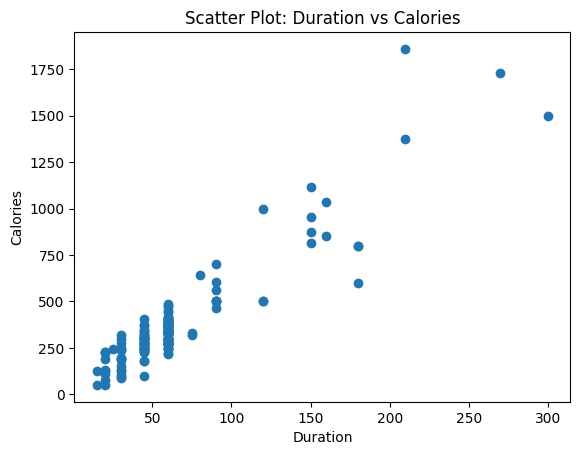

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Uploading the dataset using Colab's file upload
uploaded = files.upload()

# Reading the provided CSV file (replace 'data.csv' with the exact file name after upload)
data = pd.read_csv('data.csv')

# Showing the basic statistical description about the data.
description = data.describe()
print(description)

# Check if the data has null values.
# And then Replace the null values with the mean
check_null = data.isnull().sum()
print("Null values in each column:\n", check_null)

# Replacing null values in 'Calories' column with the mean value
replace_value = data['Calories'].mean()
data['Calories'].fillna(replace_value, inplace=True)

# Select two columns: 'Duration' and 'Calories'
sele_col = data[['Duration','Calories']]

# Aggregate the data using: min, max, count, mean
total = sele_col.aggregate(['min','max','count','mean'])
print("Aggregated data:\n", total)

# Filter the dataframe to select the rows with Calories values between 500 and 1000
betw_cal = data[(data['Calories'] >= 500) & (data['Calories'] <= 1000)]
print("Rows with Calories between 500 and 1000:\n", betw_cal)

# Filter the dataframe to select the rows with Calories < 100 or Calories > 500
in_cal = pd.concat([data[(data['Calories'] < 100)], data[(data['Calories'] > 500)]])
# Use pd.concat to combine the two filtered DataFrames
print("Rows with Calories < 100 or Calories > 500:\n", in_cal)
# Create a new dataframe excluding the 'Maxpulse' column
df_modified = data.drop('Maxpulse', axis=1)

# Delete the 'Maxpulse' column from the main dataframe
data.drop('Maxpulse', axis=1, inplace=True)

# Convert the datatype of 'Calories' column to int
data['Calories'] = data['Calories'].astype(int)

# Using pandas, create a scatter plot for the two columns (Duration and Calories)
plt.scatter(data['Duration'], data['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter Plot: Duration vs Calories')
plt.show()

2.	Linear Regression

Saving Salary_Data (2) (1).csv to Salary_Data (2) (1) (2).csv
Mean Squared Error: 21026037.329511296


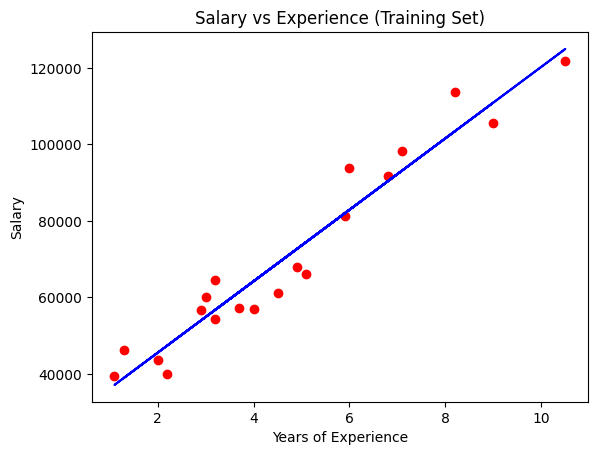

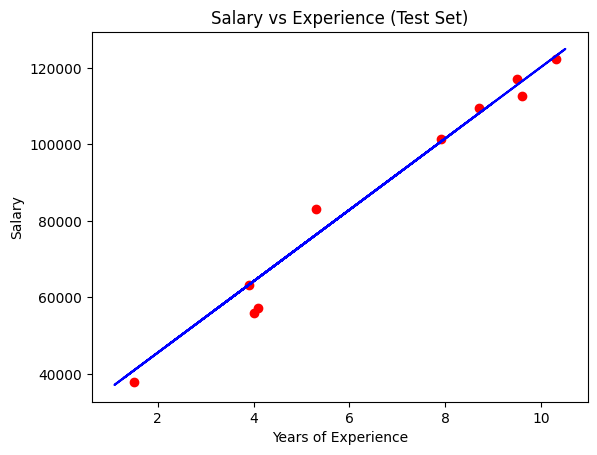

In [4]:
# Simple Linear Regression
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Uploading the dataset using Colab's file upload
uploaded = files.upload()

# Importing the datasets
# Make sure the uploaded file name matches exactly (in this case, "Salary_Data.csv")
datasets = pd.read_csv("Salary_Data (2) (1).csv")  # No need for C:/ path in Colab

X = datasets.iloc[:, :-1].values  # splitting the dataset values
Y = datasets.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set result
Y_Pred = regressor.predict(X_Test)

# Calculating mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_Test, Y_Pred)
print("Mean Squared Error:", mse)

# Visualising the Training set results
plt.scatter(X_Train, Y_Train, color='red')
plt.plot(X_Train, regressor.predict(X_Train), color='blue')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Visualising the Test set results
plt.scatter(X_Test, Y_Test, color='red')
plt.plot(X_Train, regressor.predict(X_Train), color='blue')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()